### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Synthetic Data Generation

- **`0.5 * time`**: Represents the trend (linear growth).
- **`10 * np.sin(0.2 * time)`**: Adds seasonality (cyclical pattern).
- **`np.random.normal(scale=5, size=len(time))`**: Adds noise (random fluctuations) using Normal Distribution

In [8]:
# Create synthetic data
np.random.seed(101)
time = np.arange(100)
data = 0.5 * time + 10 * np.sin(0.2 * time) + np.random.normal(scale=5, size=len(time))
data[30] += 30  # Add a local anomaly
data[80] -= 20  # Add another anomaly

df = pd.DataFrame({"Time": time, "Value": data})

### Local & Global Trends

In [9]:
# Local Trend: Moving Average
df["Local_Trend"] = df["Value"].rolling(window=10).mean()

# Global Trend: Linear Regression
global_trend = np.polyfit(time, data, deg=1)
df["Global_Trend"] = global_trend[0] * df["Time"] + global_trend[1]

### Local & Global Anomaly Detections

In [10]:
# Anomaly Detection
df["Local_Anomaly"] = (df["Value"] - df["Local_Trend"]).abs() > 12  # Local anomaly threshold
df["Global_Anomaly"] = (df["Value"] - df["Global_Trend"]).abs() > 15  # Global anomaly threshold

**Observation**

- Both conditions detect anomalies by identifying points where the absolute deviation from the local or global trend exceeds a predefined threshold, signaling values far from their 
expected behavior.

### Plot

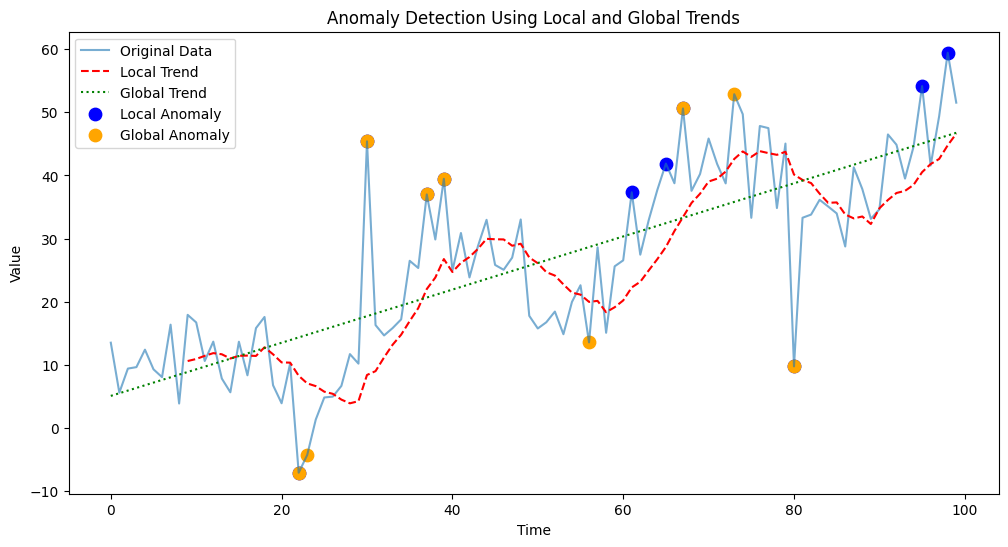

In [11]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Time"], df["Value"], label="Original Data", alpha=0.6)
plt.plot(df["Time"], df["Local_Trend"], label="Local Trend", color="red", linestyle="--")
plt.plot(df["Time"], df["Global_Trend"], label="Global Trend", color="green", linestyle=":")
plt.scatter(df[df["Local_Anomaly"]]["Time"], df[df["Local_Anomaly"]]["Value"], label="Local Anomaly", color="blue", s=80)
plt.scatter(df[df["Global_Anomaly"]]["Time"], df[df["Global_Anomaly"]]["Value"], label="Global Anomaly", color="orange", s=80)
plt.legend()
plt.title("Anomaly Detection Using Local and Global Trends")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
